<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project </h1></div>
<div style="float:right"><h1 style="font-size:16px;"> Date: 19th October 2023 </h1></div>
</div>


## Loan Default Prediction

___

### Author Information:

Name:    **David Clarke**

Contact:    **dac240@georgetown.edu**

___

## Sprint 1 Notebook

Before value can be extracted from the dataset, it is important to become wholly familiar with it. The purpose of this Jupyter Notebook is to identify any data quality issues, feature engineering opportunities and any other notable observations regarding data preprocessing. Additionally, a preliminary Exploratory Data Analysis (EDA) has been conducted to begin to describe relationships between variables, and start formulating hypotheses for further analysis.

### Table of Contents

* [EDA](#Exploratory-Data-Analysis-(EDA))
* [Next Steps](#Next-Steps:-Data-Preprocessing-&-Feature-Engineering-Opportunities)

In [61]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

This dataset was obtained from Kaggle and the original source is a challenge hosted by Coursera where it is defined as a 'real world dataset' without revealing the actual company or specifics surrounding where the data originated. 

In [64]:
# Read in the data from the CSV file and assign to variable 'df'

df = pd.read_csv('data/Loan_default.csv')

## Exploratory Data Analysis (EDA)

The first step in EDA is using 'head' to take a first glimpse of the data.

In [71]:
# Initial check of the first 5 rows in the dataset

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [72]:
# Check of 5 randomly selected rows in the dataset

df.sample(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
51506,A1NJFC9198,35,45601,120955,665,83,1,14.12,48,0.75,PhD,Full-time,Divorced,Yes,No,Auto,Yes,0
129921,DFCT7G4815,41,144970,161535,610,75,2,4.48,12,0.37,Master's,Full-time,Divorced,No,Yes,Home,Yes,0
226629,G8YDK2X7X8,57,16773,133267,407,118,3,6.19,24,0.77,PhD,Full-time,Single,No,Yes,Education,No,0
66,ZOPZLF57NR,67,77135,159839,529,59,4,4.14,36,0.41,High School,Full-time,Married,Yes,Yes,Other,No,0
115201,G3IFLN4QSU,29,136538,241492,775,89,4,16.71,24,0.49,Master's,Self-employed,Married,Yes,Yes,Auto,No,0


It is prudent to also create a Data Dictionary and describe the features in more detail.

In [70]:
# Create a Data Dictionary

data_dictionary = {
    'LoanID': 'Unique identifier for the loan.',
    'Age': 'Age of the borrower.',
    'Income': 'Income of the borrower.',
    'LoanAmount': 'Amount of loan taken.',
    'CreditScore': "Borrower's credit score.",
    'MonthsEmployed': 'Duration (in months) the borrower has been employed.',
    'NumCreditLines': 'Number of credit lines the borrower has.',
    'InterestRate': 'Interest rate of the loan.',
    'LoanTerm': 'Term of the loan in months.',
    'DTIRatio': 'Debt-to-Income ratio.',
    'Education': 'Education level of the borrower.',
    'EmploymentType': 'Type of employment (e.g., Full-time, Part-time).',
    'MaritalStatus': 'Marital status of the borrower.',
    'HasMortgage': 'Whether the borrower has a mortgage.',
    'HasDependents': 'Whether the borrower has dependents.',
    'LoanPurpose': 'Purpose for which the loan was taken.',
    'HasCoSigner': 'Whether there is a co-signer for the loan.',
    'Default': 'Whether the loan defaulted (1 for Yes, 0 for No).'
}

data_dictionary

{'LoanID': 'Unique identifier for the loan.',
 'Age': 'Age of the borrower.',
 'Income': 'Income of the borrower.',
 'LoanAmount': 'Amount of loan taken.',
 'CreditScore': "Borrower's credit score.",
 'MonthsEmployed': 'Duration (in months) the borrower has been employed.',
 'NumCreditLines': 'Number of credit lines the borrower has.',
 'InterestRate': 'Interest rate of the loan.',
 'LoanTerm': 'Term of the loan in months.',
 'DTIRatio': 'Debt-to-Income ratio.',
 'Education': 'Education level of the borrower.',
 'EmploymentType': 'Type of employment (e.g., Full-time, Part-time).',
 'MaritalStatus': 'Marital status of the borrower.',
 'HasMortgage': 'Whether the borrower has a mortgage.',
 'HasDependents': 'Whether the borrower has dependents.',
 'LoanPurpose': 'Purpose for which the loan was taken.',
 'HasCoSigner': 'Whether there is a co-signer for the loan.',
 'Default': 'Whether the loan defaulted (1 for Yes, 0 for No).'}

The next step is to understand the size of the dataset, ie. the number of rows and columns.

In [88]:
# Check the number of rows and columns in the dataset

print(f'The number of rows in the dataset is {df.shape[0]}')
print(f'The number of columns in the dataset is {df.shape[1]} (this includes the target variable as well)')

The number of rows in the dataset is 255347
The number of columns in the dataset is 18 (this includes the target variable as well)


Next, the data should be examined to understand the data types of each column and ensure they align with expectations. Following that, the data distributions will be explored as well as any potential outliers, and other potential errors in the data.

In [98]:
# Obtain an understanding of the datatypes as well as an initial check for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The data types for each column are as follows:

- LoanID: Object (String) - This is expected as it is likely a unique identifier.
- Age: Integer
- Income: Integer
- LoanAmount: Integer
- CreditScore: Integer
- MonthsEmployed: Integer
- NumCreditLines: Integer
- InterestRate: Float
- LoanTerm: Integer
- DTIRatio: Float
- Education: Object (String) - Categorical variable indicating the education level.
- EmploymentType: Object (String) - Categorical variable indicating the type of employment.
- MaritalStatus: Object (String) - Categorical variable indicating marital status.
- HasMortgage: Object (String) - Categorical variable indicating if the borrower has a mortgage.
- HasDependents: Object (String) - Categorical variable indicating if the borrower has dependents.
- LoanPurpose: Object (String) - Categorical variable indicating the purpose of the loan.
- HasCoSigner: Object (String) - Categorical variable indicating if there's a co-signer for the loan.
- Default: Integer - Binary target variable (1 for default, 0 for no default).

The data types seem appropriate for each feature.

In [87]:
# Check for missing values and duplicated rows

missing_values = df.isnull().sum().sum()
duplicate_rows = df.duplicated().sum().sum()

print(f'There are {missing_values} missing values in the dataset')
print('-'*42)
print(f'There are {duplicate_rows} duplicate rows in the dataset')

There are 0 missing values in the dataset
------------------------------------------
There are 0 duplicate rows in the dataset


To obtain some key statistical information for the 10 numerical columns in the data set, the describe function can be used.

In [85]:
# Obtain a statistical summary of the numerical columns

df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


The key descriptive statistics for the numerical columns:

- `Age`: ranges from 18 to 69 with a mean age of approx. 43.5 years.

- `Income`: ranges from \\$15,000 to \\$149,999 with a mean income of approx. \\$82,499.

- `LoanAmount`: ranges from \\$5,000 to \\$249,000 with a mean loan amount of approx. \\$127,579.

- `CreditScore`: ranges from 300 to 849 with a mean score of approx. 574.

- `MonthsEmployed`: ranges from 0 to 119 months with a mean of approx. 59.5 months.

- `NumCreditLines`: ranges from 1 to 4 with a mean of approx. 2.5.

- `InterestRate`: ranges from 2% to 25% with a mean of approx. 13.49%.

- `LoanTerm`: ranges from 12 to 60 months with a mean of approx. 36 months.

- `DTIRatio`: ranges from 0.1 to 0.9 with a mean of approx. 0.5.

- `Default`: This is the target variable. The mean value is approximately 0.116, indicating that approx. 11.6% of the loans in this dataset have defaulted.





Next, it is important to visualize the distribution of the target variable (Default) to gain an understanding of the balance of the data.

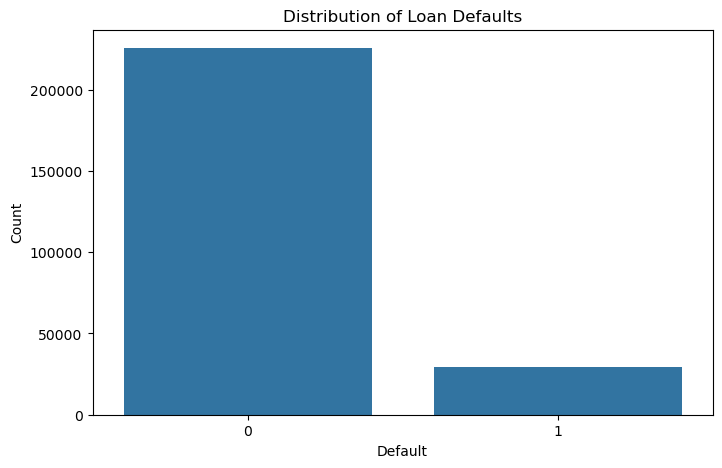

In [84]:
# Visualize the distribution of the 'Default' variable

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Default')
plt.title('Distribution of Loan Defaults')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

The visualization shows the distribution of the Default variable:

A significant number of loans have not defaulted (represented by 0) while a smaller proportion of loans have defaulted (represented by 1). This indicates that the dataset is imbalanced, where the majority class (non-defaults) vastly outnumbers the minority class (defaults). This imbalance is important to consider when building machine learning models as it can have an impact on overall model performance and evaluation metrics.

Next, it would be prudent to visualize the distribution of some of the key numerical features, such as Age, Income, LoanAmount, CreditScore, Interest Rate and Debt to Income ratio.

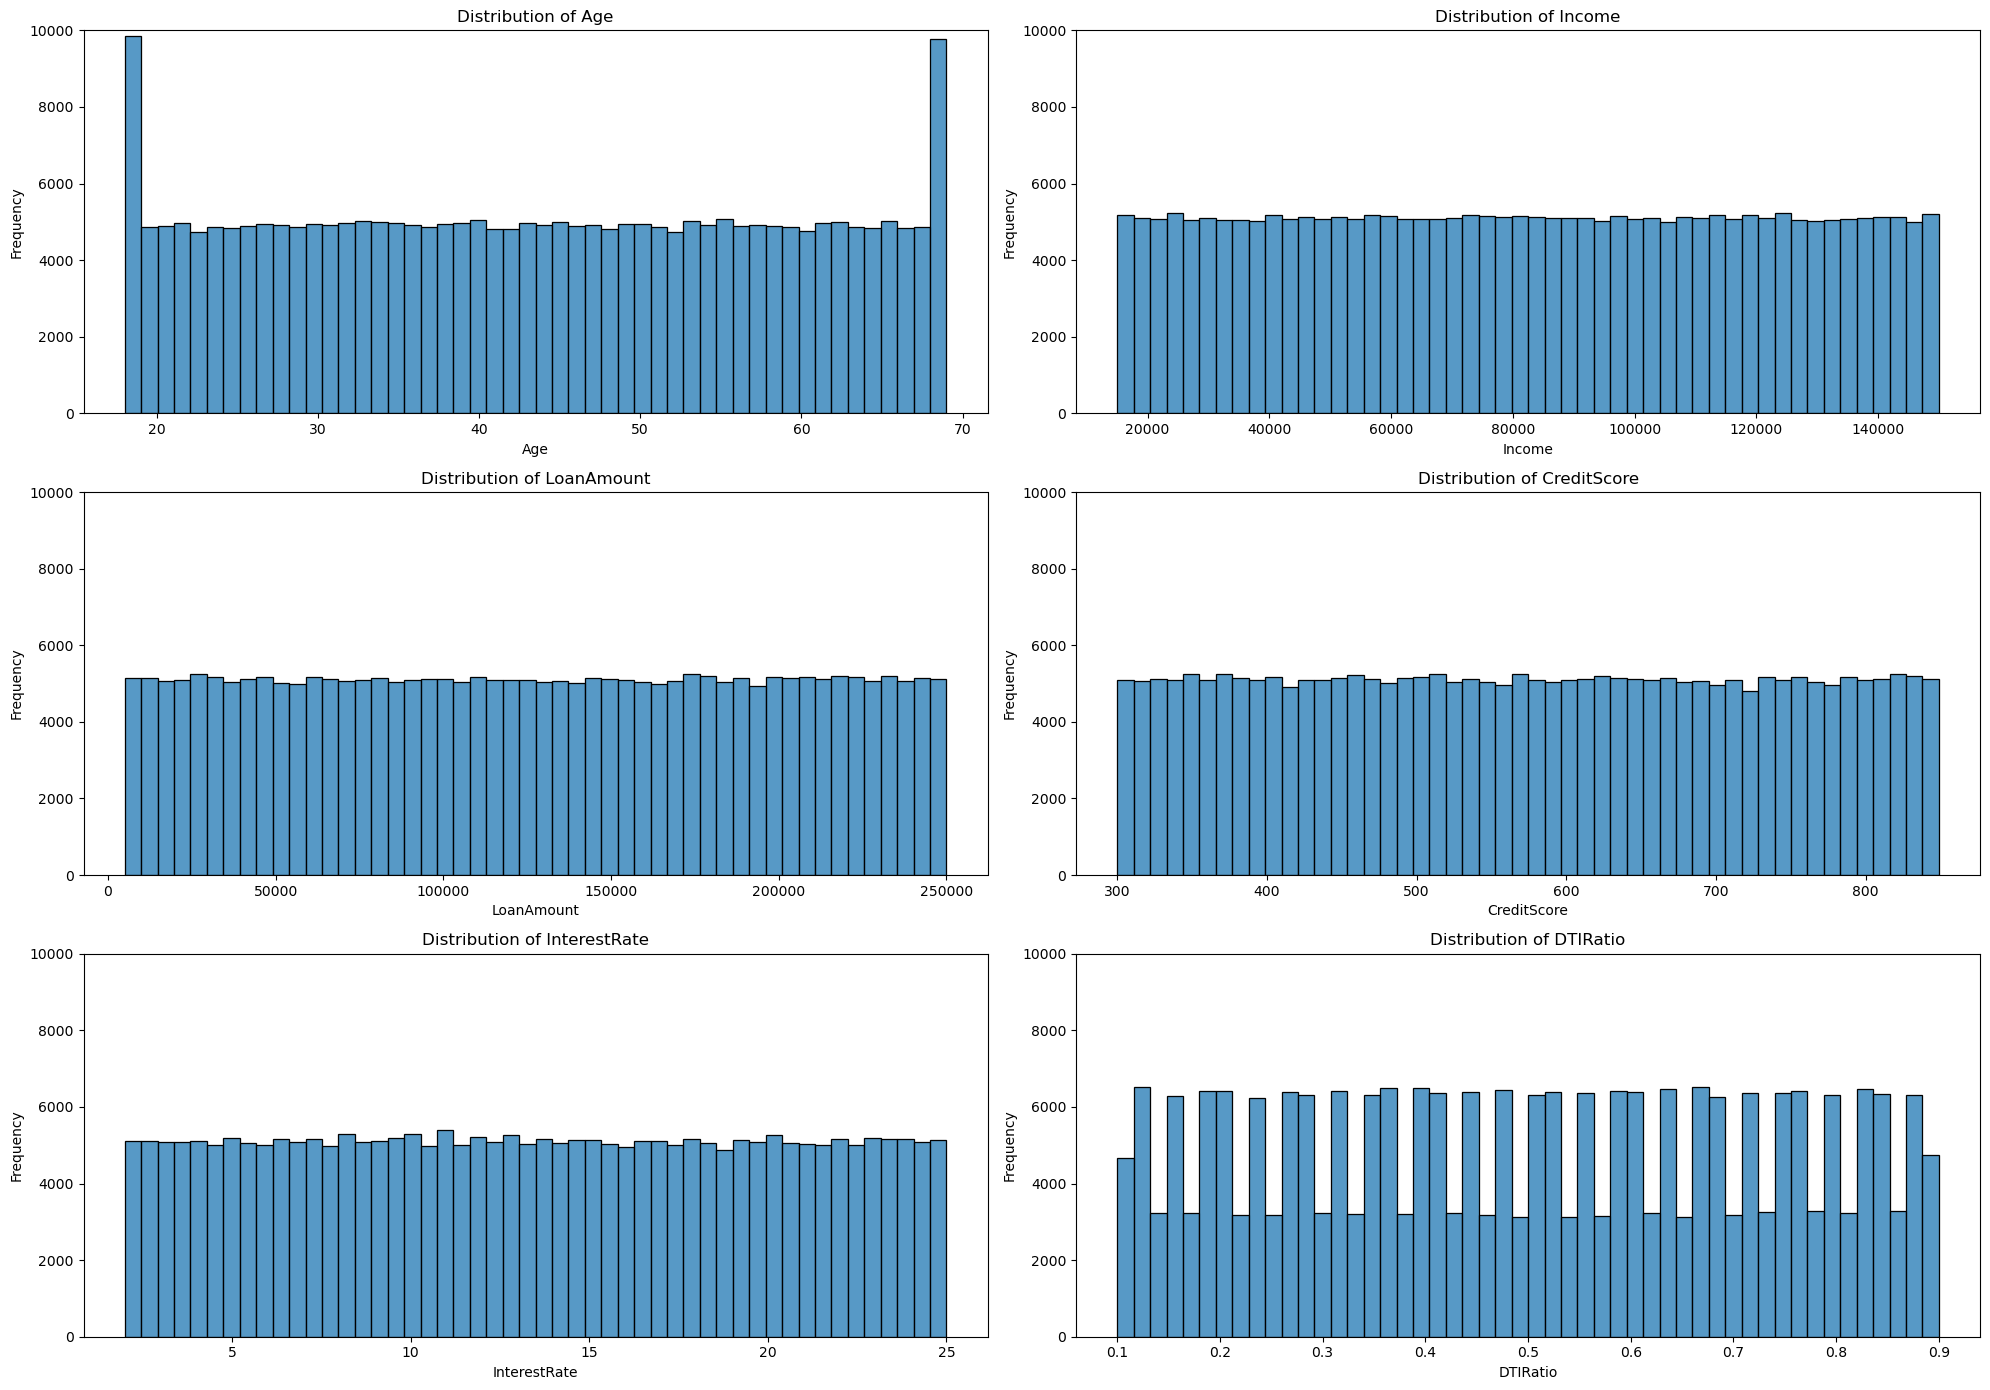

In [119]:
features_to_plot = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'DTIRatio']

plt.figure(figsize=(20, 14))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.gca().set_ylim([0, 10000])
    
plt.tight_layout()
plt.show()

Observations:

- The distributions for `Income`, `LoanAmount`, `CreditScore`, `InterestRate` and `DTIRatio` are uniform. 
- The `Age` distribution is mostly uniform except for an increase in frequency for ages in the late 20s to early 40s.


Next, the distributions of some categorical features, such as `Education`, `EmploymentType`, and `MaritalStatus` will be examined visually.

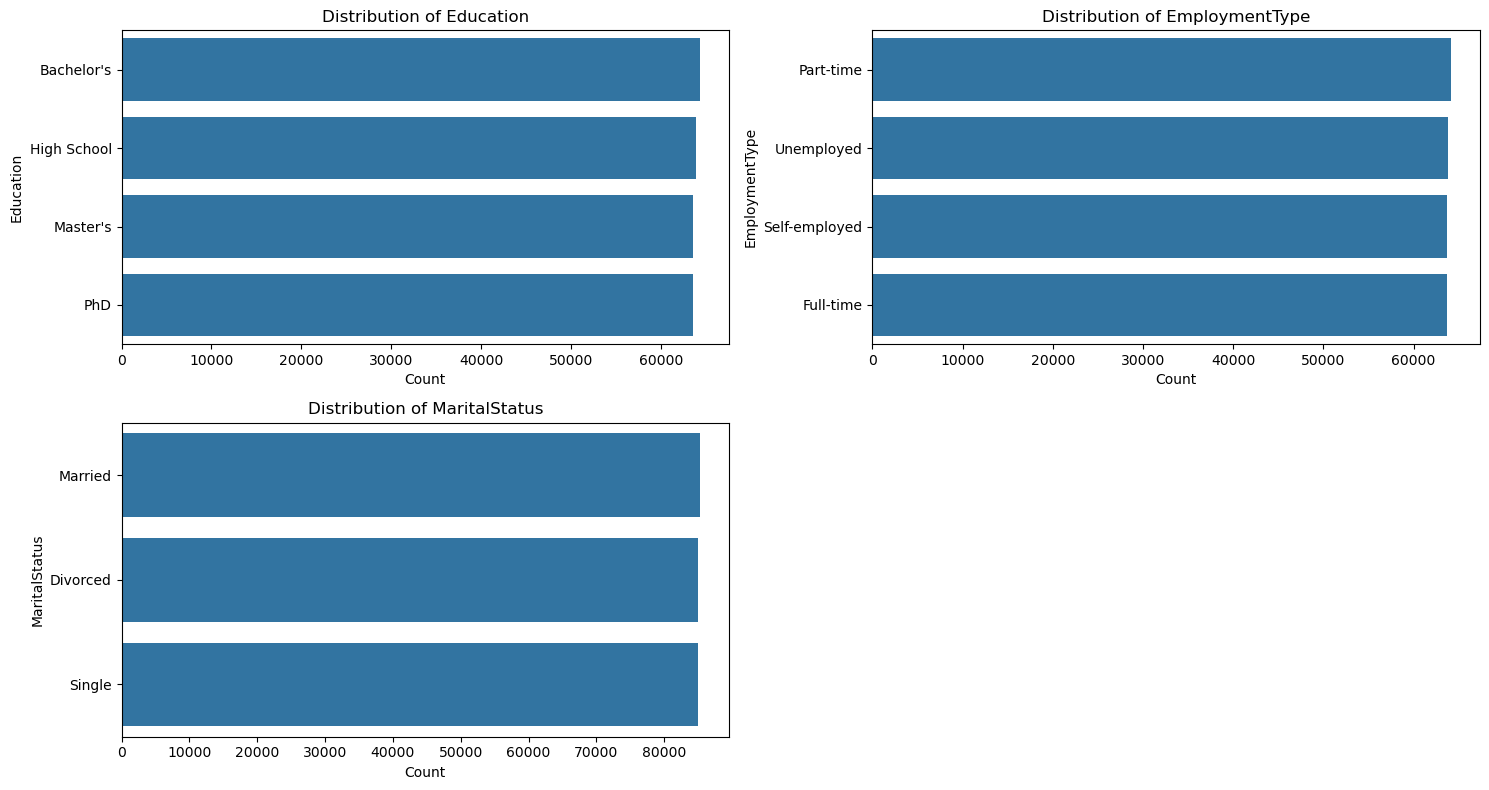

In [129]:
# Visualizing the distribution of some key categorical features

categorical_features = ['Education', 'EmploymentType', 'MaritalStatus']

plt.figure(figsize=(15, 8))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Observations from the key categorical features:

The distributions for `Education`, `Employment Type` and `Marital Status` are, for the most part, uniform.

To further the analysis, the relationship between these categorical features and the likelihood of a loan default is examined. This can provide insights into which categories within these features are more prone to defaulting.

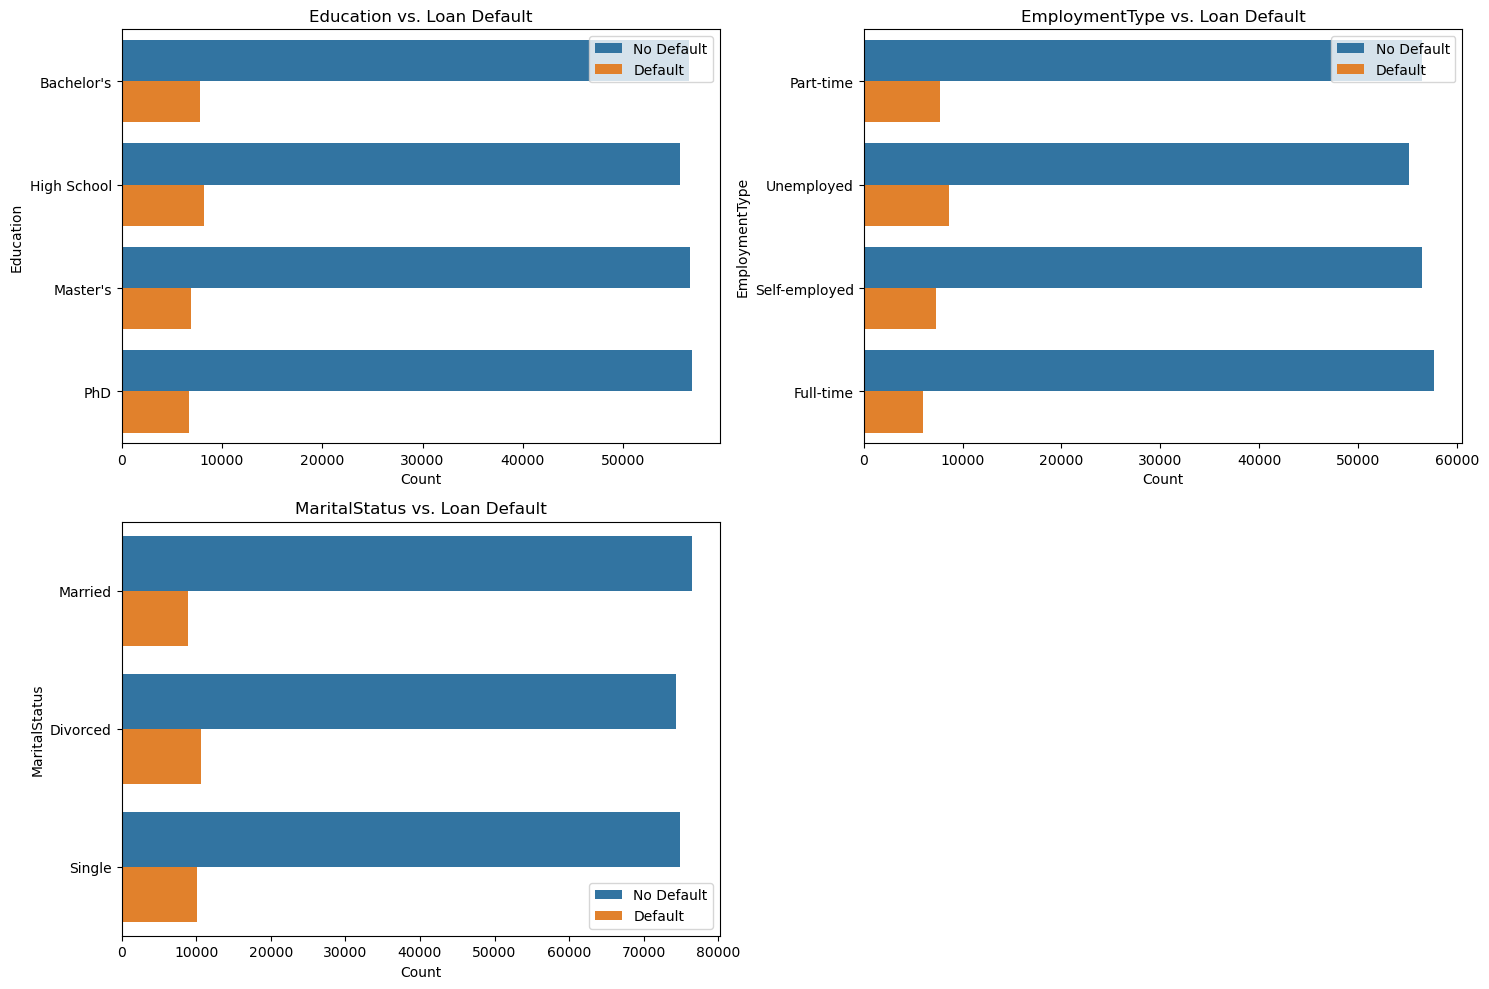

In [123]:
# Exploring the relationship between categorical features and loan default

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=feature, hue='Default', order=df[feature].value_counts().index)
    plt.title(f'{feature} vs. Loan Default')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.legend(labels=['No Default', 'Default'])

plt.tight_layout()
plt.show()


Observations:

- `Education`:
  - Borrowers with a high school education and Bachelor's degree seem to have the highest number of defaults, as compared with borrowers with a Master's and PhD.

- `EmploymentType`:
  - Full-time employees have the lowest number of defaults while unemployed borrowers have the highest number of defaults. Additionally, the proportion of defaults relative to the total number of unemployed borrowers is high relative to the other employement types. 
 
- `MaritalStatus`:
  - Divorced borrowers have the highest number of defaults. Additionally, the proportion of defaults relative to the total number of divorced borrowers is highest relative to that of married and single borrowers. Married borrowers have the lowest number of defaults.
  
These insights can form the basis of potential hypotheses:

- Higher education levels might be associated with lower default rates.
- Unemployment might increase the risk of loan default.
- Divorced borrowers may have a higher likelihood of defaulting.

It is also beneficial to visualize the relationship between numerical features and the likelihood of a loan default.

/var/folders/v3/zck8zg6d151fkdvw1j6mmm4h0000gn/T/ipykernel_84535/4046071473.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=df, palette={'0': 'skyblue', '1': 'salmon'})
/var/folders/v3/zck8zg6d151fkdvw1j6mmm4h0000gn/T/ipykernel_84535/4046071473.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=feature, data=df, palette={'0': 'skyblue', '1': 'salmon'})
/var/folders/v3/zck8zg6d151fkdvw1j6mmm4h0000gn/T/ipykernel_84535/4046071473.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Default', y=

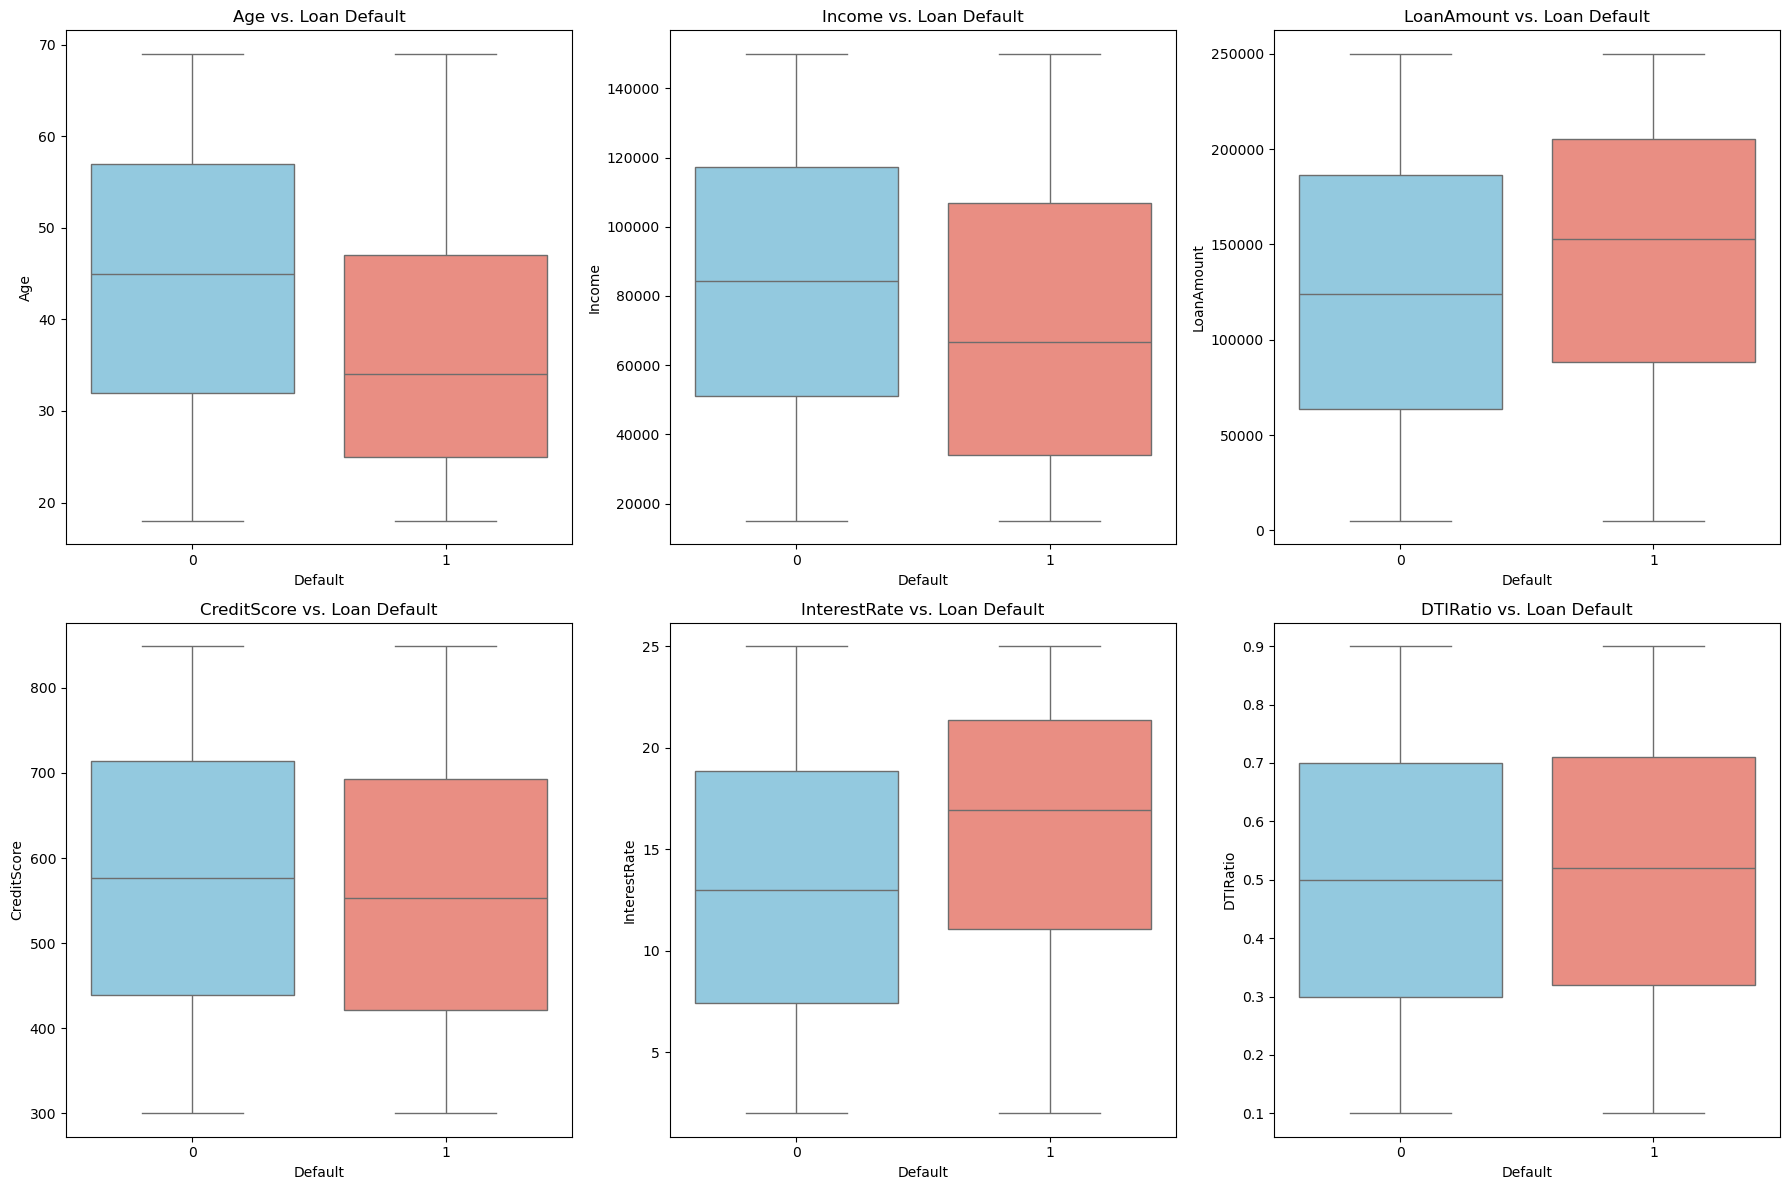

In [167]:


# Define the numerical features
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'InterestRate', 'DTIRatio']

# Visualizing the distribution of numerical features against the Default category with different colors
plt.figure(figsize=(18, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Default', y=feature, data=df, palette={'0': 'skyblue', '1': 'salmon'})
    plt.title(f'{feature} vs. Loan Default')
    plt.xlabel('Default')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


Observations:

- `Age`: The median age of those borrowers who defaulted is lower than that of those who did not default. However, the age range is very similar for both groups.
- `Income`: Borrowers who defaulted generally have a lower median income compared to the income of borrowers who did not default.
- `LoanAmount`: The median loan amount for borrowers who defaulted is higher than for those who did not default.
- `CreditScore`: In line with expectations, borrowers who defaulted tend to have lower credit scores compared to those who did not. In this case, borrowers who defaulted have a slightly lower credit score than borrowers that did not default.
- `InterestRate`: Borrowers who defaulted tend to have higher interest rates on average than borrowers who did not default.
- `DTIRatio`: The Debt-to-Income ratio shows that an insignificant variation in the median for borrowers who defaulted versus borrowers who did not default.

These insights can allow the formulation of additional hypotheses:

- `Age` and `Default`: A younger aged borrower may be more likely to default than an older aged borrower.
- `Income` and `Default`: Lower income for a borrower may increase the risk of default.
- `LoanAmount` and `Default`: A higher loan amount, especially relative to one's income, may increase the risk of default.
- `CreditScore` and `Default`: A lower credit score, indicating a history of poor financial management or previous defaults, is likely correlated with a higher risk of default.
- `InterestRate` and `Default`: A higher interest rate, which increases the financial burden on the borrower, may increase the risk of default.

A heatmap displaying the Pearson correlation coefficients between the "Default" column and other numerical columns in the dataset would be another effective way to understand the relationship further and refine the initial hypotheses.

A positive correlation indicates that as one variable increases, the target `Default` also tends to increase, while a negative correlation indicates that as one variable increases, the target `Default` tends to decrease.
   
The values range between -1 (perfect negative correlation) and 1 (perfect positive correlation). A value close to 0 indicates a weak correlation.

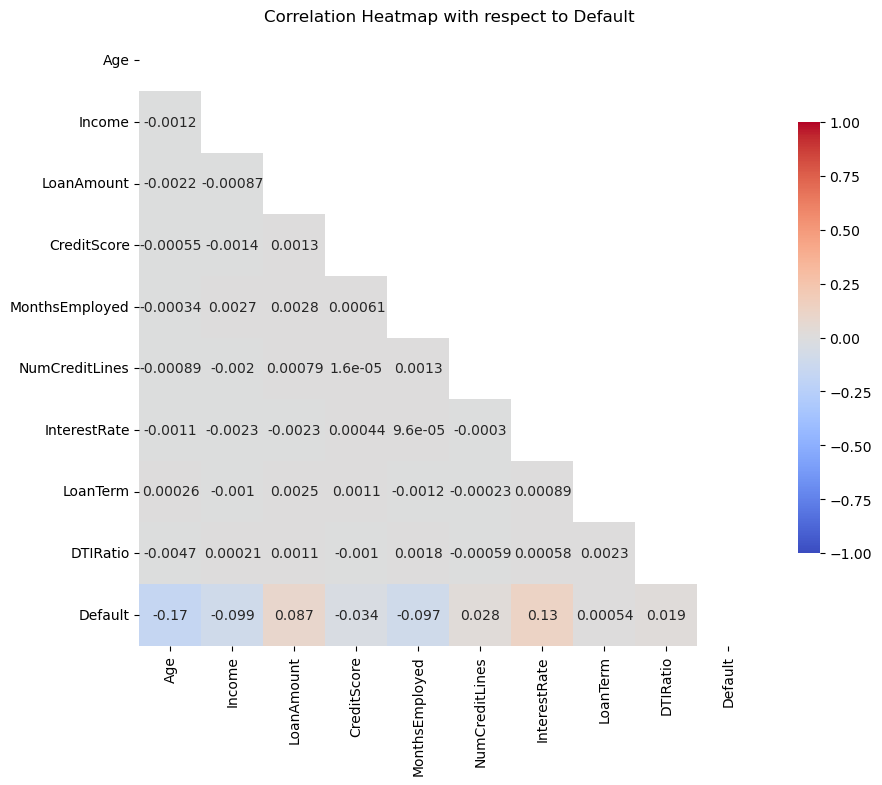

In [151]:
# Calculate correlations for numeric columns with respect to the target variable 'Default'

numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlations = numeric_cols.corr()

# Plotting a heatmap 

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linecolor='none', mask=mask, cbar_kws={"shrink": 0.7})
plt.title('Correlation Heatmap with respect to Default')
plt.show()

Observations:

- `Default` is positively correlated with `InterestRate`, `LoanAmount` and `NumCreditLines`

As these variables increase, the likelihood of Default also increases. Similarly, as these variabes decrease, the likelihood of Default also decreases. There is a positive or direct relationship. 

- `Default` is negatively correlated with `Age`, `Income`, `CreditScore` and `MonthsEmployed`

As these variables increase, the likelihood of Default decrease. Similarly, as these variabes decrease, the likelihood of Default increases. There is a negative or inverse relationship.

## Next Steps: Data Preprocessing & Feature Engineering Opportunities 

In terms of data preprocessing, some techniques utilized will be:

1) **One-hot Encoding** as categorical features like `Education`, `EmploymentType` and `MaritalStatus` need to be converted to numeric values which would be suitable for machine learning. 

2) **Feature Scaling** in order to normalize certain features to bring them to a similar scale. Features like `Income`, `LoanAmount`, and `CreditScore` have different scales. Scaling them may be necessary for models that are sensitive to feature scales such as logistic regression and support vector machines.

In terms of feature engineering opportunities, some include:

1) **Binning Continuous Variables** like `Age`, `Income` and `CreditScore` into categories:
  - `Age` could be categorized into "Young", "Middle-aged", "Senior".
  - `Income` levels could be categorized as "Low", "Medium", "High".
  - `CreditScore` could be categorized into "Poor", "Good", "Excellent".
  
2) **Creating new features** based on interactions between existing features within the dataset. Some include:
  - combining `Income` and `LoanAmount` to represent the proportion of income requested as a loan.
  - combining `MonthsEmployed` and `Age` to gain an understanding of career stability. 